In [1]:
import numpy as np 
import pandas as pd
import json

from collections import Counter
import matplotlib.pyplot as plt

import string
import re

# Load CSV Data

In [2]:
df = pd.read_csv("./blogtext.csv")
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


# Clean Data

In [3]:
# Remove Unwanted Columns
cols_to_drop = ['id','gender','age','sign','date']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,topic,text
0,Student,"Info has been found (+/- 100 pages,..."
1,Student,These are the team members: Drewe...
2,Student,In het kader van kernfusie op aarde...
3,Student,testing!!! testing!!!
4,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can ...


In [4]:
# Count unique folders and check for missing values
print("Unique Topics: ", len(df['topic'].unique()))
print("Missing values in fields :")
print(df.isnull().sum())

Unique Topics:  40
Missing values in fields :
topic    0
text     0
dtype: int64


In [5]:
df.shape

(681284, 2)

In [5]:
df['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [6]:
# Drop indUnk
df = df[~df.topic.eq('indUnk')]
df['topic'].value_counts()

Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing                2272
Biotech       

In [7]:
df.shape

(430269, 2)

In [8]:
# Print blog entries from selected topic
def printblogs(blogs, cleaned):
    if cleaned:
        for blog in blogs['cleaned_text']:
            print(blog,'\n')
    else:
        for blog in blogs['text']:
            print(blog,'\n')

In [9]:
select_topic = df.loc[df['topic'] == 'Maritime']
printblogs(select_topic, False)

              And Don't Forget to Feel Good About Yourself.   David Brooks takes another swing at hyper-competitive students, what he calls 'project kids,' in an  urlLink Op-Ed  in yesterday's Times.  The overall message of the piece is a good one: that high school students shouldn't be obsessed with getting into the 'top' college, or be overly burdened by the test scores, grades, and extracurricular activities that are prerequisite at a lot of these places.  But in making this plea, Brooks writes a lot of things are misleading or simply not true, and the average reader who take his advice to heart and actually act on it are setting themselves up for disappointment and failure.   First, Brooks, as only he can, makes generalizations like '[y]ou are being judged according to criteria that you would never use to judge another person and which will never again be applied to you once you leave higher ed.' This would be true, if you plan to being a subsistence fisherman in Bermuda or a porn 

In [10]:
# Remove unprintable characters, unknown unicodes, &nbsp (non-braking space placeholder) and urlLink (urlLink placeholder)
# Printable characters: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
cleaned_text=[]
count_nbsp = 0
count_url= 0
for text in df['text']:
    filtered_string = ''.join(filter(lambda x: x in string.printable, text))
    filtered_string = re.sub(r'&#\S+ ', r'', filtered_string)
    filtered_string = re.sub(r'&nbsp', r'', filtered_string)
    filtered_string = re.sub(r'urlLink', r'', filtered_string)
    cleaned_text.append(filtered_string)
df['cleaned_text']= cleaned_text
print(count_nbsp)
print(count_url)

0
0


In [11]:
select_topic = df.loc[df['topic'] == 'Maritime']
printblogs(select_topic, True)

              And Don't Forget to Feel Good About Yourself.   David Brooks takes another swing at hyper-competitive students, what he calls 'project kids,' in an   Op-Ed  in yesterday's Times.  The overall message of the piece is a good one: that high school students shouldn't be obsessed with getting into the 'top' college, or be overly burdened by the test scores, grades, and extracurricular activities that are prerequisite at a lot of these places.  But in making this plea, Brooks writes a lot of things are misleading or simply not true, and the average reader who take his advice to heart and actually act on it are setting themselves up for disappointment and failure.   First, Brooks, as only he can, makes generalizations like '[y]ou are being judged according to criteria that you would never use to judge another person and which will never again be applied to you once you leave higher ed.' This would be true, if you plan to being a subsistence fisherman in Bermuda or a porn star af

# Create Train-Test Split

In [12]:
def draw_label_distribution(input_labels, datasplit):
    labels = []
    for label in input_labels:
        labels.append(label)
    unique_labels = list(Counter(labels).keys())
    print("Number of unique labels: ",len(unique_labels))
    label_count = list(Counter(labels).values())
    label_count.sort(reverse=True)
    x = np.array(unique_labels)
    y = np.array(label_count)

    f, ax = plt.subplots(figsize=(8, 10))
    plt.bar(unique_labels, label_count)
    plt.yscale('log')
    plt.xticks([])
    plt.yticks(fontsize=18)
    plt.ylabel("# of occurrences in logarithmic scale", fontsize=18)
    plt.xlabel("Labels", fontsize=18)
    plt.tight_layout()
    plt.savefig(datasplit)

Number of unique labels:  39


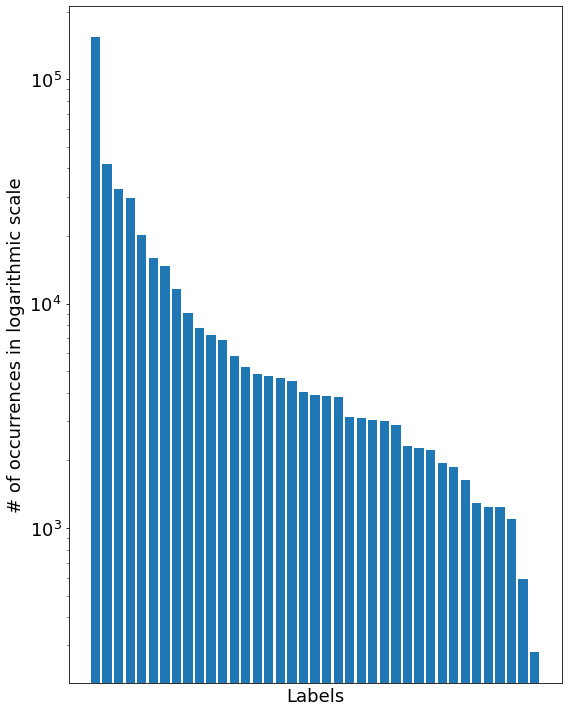

In [13]:
# Draw full data label distribution
draw_label_distribution(df['topic'], "full_label_dist")

In [14]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print(X_train.shape)

(344215,)


Number of unique labels:  39


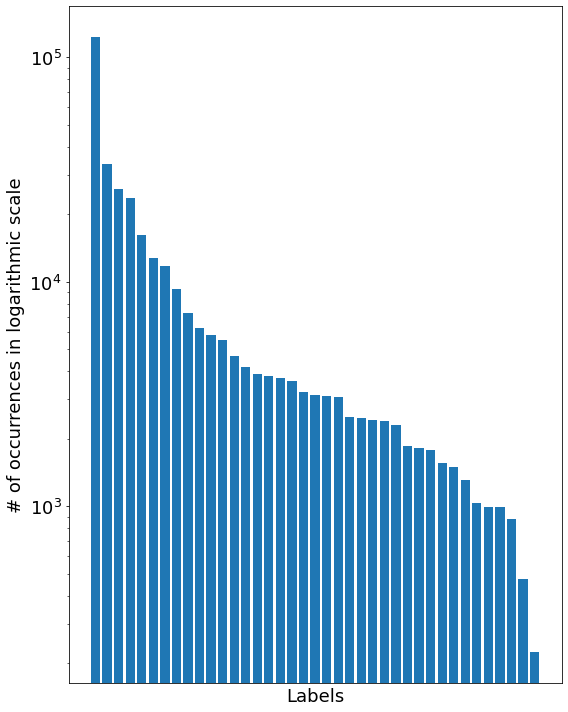

In [15]:
# Draw training data label distribution
draw_label_distribution(y_train, "train_label_dist")

Number of unique labels:  39


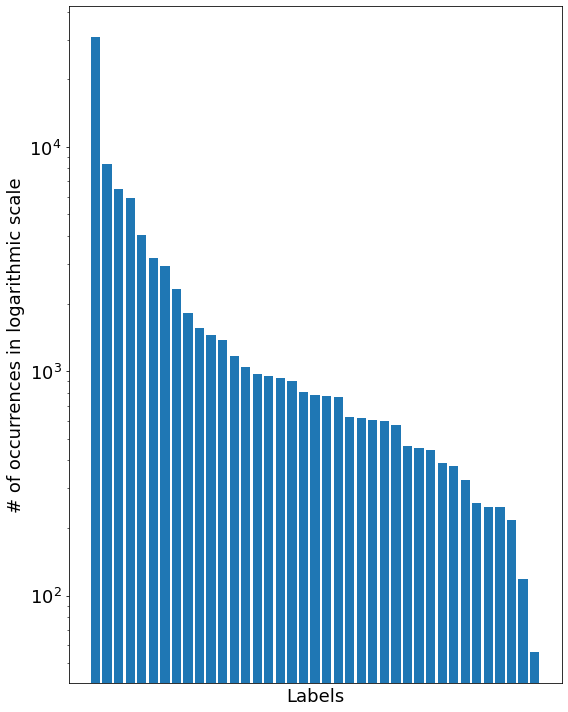

In [16]:
# Draw test data label distribution
draw_label_distribution(y_test, "test_label_dist")

# Save Data to JSON

In [17]:
df_train = X_train.to_frame().join(y_train)
df_test = X_test.to_frame().join(y_test)

train_json = df_train.to_json(orient="records")
train_json_parsed = json.loads(train_json)

with open('train_data.json', 'w') as outfile:
    json.dump(train_json_parsed, outfile)

test_json = df_test.to_json(orient="records")
test_json_parsed = json.loads(test_json)

with open('test_data.json', 'w') as outfile:
    json.dump(test_json_parsed, outfile)

In [18]:
test_list = json.load(open("test_data.json",))
test_data = np.array(list(map(lambda x: list(x.values())[:1], test_list)),dtype=object)
test_labels = np.array(list(map(lambda x: list(x.values())[1], test_list)),dtype=object)
print(len(test_data))
print(len(test_labels))

train_list = json.load(open("train_data.json",))
train_data = np.array(list(map(lambda x: list(x.values())[:1], train_list)),dtype=object)
train_labels = np.array(list(map(lambda x: list(x.values())[1], train_list)),dtype=object)
print(len(train_data))
print(len(train_labels))

86054
86054
344215
344215
